In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import bluepysnap  # https://bluebrainsnap.readthedocs.io/en/stable/
import neurom  # https://neurom.readthedocs.io/en/stable/
import pandas
import numpy
import scipy

from neurom import viewer

fn_extr = "O1_data_anatomy/circuit_config.json"
circ_extr = bluepysnap.Circuit(fn_extr)


In [3]:
# skip_slow = True

# from bluepysnap.circuit_validation import validate
# errors = validate("O1_data_anatomy/circuit_config.json", skip_slow, only_errors=False, print_errors=True)

### Neuron populations and their properties

The model contains a number of neuron (or node) populations. Let's list them, then I'll explain them

In [4]:
print(circ_extr.nodes.population_names)

['POm', 'S1nonbarrel_neurons', 'VPM', 'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical', 'external_midrange__S1nonbarrel_neurons__chemical']


We find five populations. One population is the most important one: 'S1nonbarrel_neurons' denotes the neurons actually in the model. The ones that can be simulated. The other four denote external populations that innervate the 'S1nonbarrel_neurons':

'POm' and 'VPM' are innervating neurons from those thalamic nuclei respectively. Representing a "matrix-type" and "core-type" projection respectively.
'external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical' and 'external_midrange__S1nonbarrel_neurons__chemical' denote nonbarrel S1 neurons outside the modeled population that innervate the modeled population. The difference between them is as follows: 'external_midrange...' innervates via long-range connections, while 'external_S1...' innervates via local connections. For an explanation of "local" vs. "long-range" connections, see the accompanying manuscript. 


Now we can load the properties of the neurons in these populations.

In [5]:
lst_properties = ['layer', 'region', 'synapse_class', 'population',
                  'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
                  'morph_class', 'model_type', 'mtype', 'morphology',
                  'x', 'y', 'z']

lst_properties = [ 'etype', 'exc_mini_frequency', 'inh_mini_frequency', 'layer', 'me_combo', 'model_template', 'model_type', 'morph_class', 'morphology', 'mtype', 
                  'orientation_w', 'orientation_x', 'orientation_y', 'orientation_z', 'population', 'region', 'synapse_class', '@dynamics:holding_current', 
                  '@dynamics:input_resistance', '@dynamics:resting_potential', '@dynamics:threshold_current', 'x', 'y', 'z']
n_props = circ_extr.nodes['S1nonbarrel_neurons'].get(properties=lst_properties)
display(n_props)

,etype,exc_mini_frequency,inh_mini_frequency,layer,me_combo,model_template,model_type,morph_class,morphology,mtype,...,population,region,synapse_class,@dynamics:holding_current,@dynamics:input_resistance,@dynamics:resting_potential,@dynamics:threshold_current,x,y,z
node_ids,,,,,,,,,,,,,,,,,,,,,
0,bNAC,0.010108,0.233243,1,bNAC_L23SBC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23SBC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.063857,163.571762,-74.320229,0.114051,4652.171846,-1930.525524,-1836.395782
1,cNAC,0.010108,0.233243,1,cNAC_L23NGC_L1_DAC_1_C270106A_-_Scale_x1.000_y...,hoc:cNAC_L23NGC,biophysical,INT,C270106A_-_Scale_x1.000_y1.025_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.056414,192.304916,-73.626152,0.083738,4977.735899,-1641.041348,-2140.579908
2,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_sm120429_2photon_a1-3_idA...,hoc:bNAC_L23NGC,biophysical,INT,sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...,L1_DAC,...,S1nonbarrel_neurons,S1J,INH,-0.059054,169.438538,-72.886154,0.084117,5011.718764,-1565.779688,-2212.599874
3,cNAC,0.010108,0.233243,1,cNAC_L6NGC_L1_DAC_1_sm090918b1-3_idB_-_Scale_x...,hoc:cNAC_L6NGC,biophysical,INT,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.100206,100.864609,-74.003380,0.157909,4266.789018,-1804.711830,-1531.716011
4,bNAC,0.010108,0.233243,1,bNAC_L23NGC_L1_DAC_1_C270106C_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C270106C_-_Scale_x1.000_y0.975_z1.000,L1_DAC,...,S1nonbarrel_neurons,S1FL,INH,-0.040889,247.846909,-72.796501,0.052005,4779.539653,-1259.558916,-1996.720501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211707,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_C240300C1_-_Scale_x1.000_y...,hoc:bNAC_L23NGC,biophysical,INT,C240300C1_-_Scale_x1.000_y0.975_z1.000_-_Clone_1,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.043246,259.866028,-71.974144,0.048974,4053.191307,-663.722760,-2140.027223
211708,dSTUT,0.010108,0.233243,5,dSTUT_L5BP_L5_BP_5_C240300C1_-_Clone_0,hoc:dSTUT_L5BP,biophysical,INT,C240300C1_-_Clone_0,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.072633,66.215591,-76.741768,0.182784,4002.636889,-1382.419711,-2641.743271
211709,bNAC,0.010108,0.233243,5,bNAC_L23NGC_L5_BP_5_rp110127_L5-2_idC_-_Scale_...,hoc:bNAC_L23NGC,biophysical,INT,rp110127_L5-2_idC_-_Scale_x1.000_y1.025_z1.000,L5_BP,...,S1nonbarrel_neurons,S1FL,INH,-0.023842,405.003632,-73.244141,0.032160,4228.866737,-909.053724,-2608.261691


'layer', 'region' specify in which cortical region and layer a neuron was placed.

'x', 'y', 'z' specify the exact coordinate (in um) in the atlas that a neuron was placed at.

'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w' define a quarternion that specifies the rotation that is applied to the neuron morphology in placement.

'synapse_class', 'morph_class', 'mtype' specify the class of neuron in terms of being excitatory vs inhibitory, pyramidal vs interneuron and the morphological type.

'morphology' specifies the name of the morphological reconstruction of the neuron

'model_type' specifies whether a neuron is actually part of the model that can be simulated ("biophysical") or an external innervator ("virtual"). As explained above, all 'S1nonbarrel_neurons' are "biophysical", the others are all "virtual".


Note that for the "virtual" neurons some properties are unassigned and therefore reported as NaN. 

In [23]:
# lst_properties_external = ['layer', 'region', 'x', 'y', 'z']

# n_props = circ_extr.nodes['external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'].get(properties=lst_properties_external)
# display(n_props) # Some columns are NaN

### Neuron morphologies

For the 'S1nonbarrel_neurons' population, we can then load their morphologies with some simple helper functions.

For this example, we load and draw and exemplary neuron. For more that can be done with the loaded morphology, see the NeuroM documentation linked in the first cell of this notebook.

In [24]:
n_props['layer'][0]

1

In [30]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
node_ids = circ_extr.nodes['S1nonbarrel_neurons'].ids()

# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids[0]])


layer                                                            1
region                                                        S1FL
synapse_class                                                  INH
population                                     S1nonbarrel_neurons
orientation_x                                             0.517516
orientation_y                                            -0.076986
orientation_z                                            -0.570522
orientation_w                                             0.633052
morph_class                                                    INT
model_type                                             biophysical
mtype                                                       L1_DAC
morphology       sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...
x                                                      4652.171846
y                                                     -1930.525524
z                                                     -1836.39

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:title={'center':'Morphology'}, xlabel='x', ylabel='y'>)

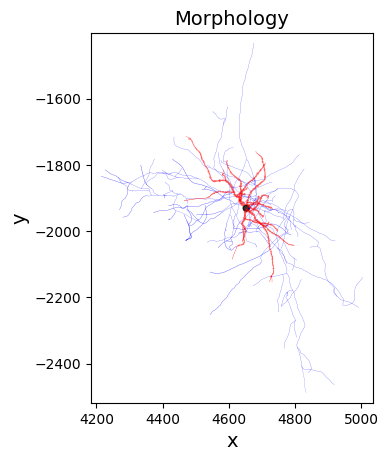

In [34]:
S1nonbarrel_cfg = circ_extr.config["networks"]["nodes"][0]["populations"]["S1nonbarrel_neurons"]

def transform_neuron(nrn_morph, neuron_row):
    rot = scipy.spatial.transform.Rotation.from_quat(neuron_row[["orientation_x", "orientation_y",
                                                                 "orientation_z", "orientation_w"]].values)
    rot = neurom.geom.transform.Rotation(rot.as_matrix())
    tl = neurom.geom.transform.Translation(neuron_row[["x", "y", "z"]].values)
    return nrn_morph.transform(rot).transform(tl)
    
def load_neuron(population_cfg, neuron_row, transform=True):
    assert neuron_row["model_type"] == "biophysical", "Cannot load morphologies of virtual neurons"
    fn = os.path.join(
        population_cfg["alternate_morphologies"]["neurolucida-asc"],
        neuron_row["morphology"] + ".asc"
    )
    nrn = neurom.load_morphology(fn)
    if transform:
        nrn = transform_neuron(nrn, neuron_row)
    return nrn

nrn_morph = load_neuron(S1nonbarrel_cfg, n_props.loc[node_ids[0]])
viewer.draw(nrn_morph)

### Synaptic connectivity

The synaptic connectivity of the model is accessed using circ_extr.edges.
As an example, let's find out which neurons innervate an exemplary neuron

In [102]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
# node_ids = circ_extr.nodes.ids().filter_population("S1nonbarrel_neurons")
node_ids = circ_extr.nodes['S1nonbarrel_neurons'].ids()

# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids[0]])

# Which neurons are afferent to the first one?
aff = circ_extr.edges.afferent_nodes(node_ids[0])

aff_ids = []
for population,id1 in list(aff):
    aff_ids.append(id1)
#     print(population,id1)
    

# What's returned can be used as index into the neuron properties data frame
aff_props = n_props.loc[aff_ids]

display(aff_props.head())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["region"].value_counts())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["population"].value_counts())

layer                                                            1
region                                                        S1FL
synapse_class                                                  INH
population                                     S1nonbarrel_neurons
orientation_x                                             0.517516
orientation_y                                            -0.076986
orientation_z                                            -0.570522
orientation_w                                             0.633052
morph_class                                                    INT
model_type                                             biophysical
mtype                                                       L1_DAC
morphology       sm120429_2photon_a1-3_idA_-_Scale_x1.000_y0.97...
x                                                      4652.171846
y                                                     -1930.525524
z                                                     -1836.39

,layer,region,synapse_class,population,orientation_x,orientation_y,orientation_z,orientation_w,morph_class,model_type,mtype,morphology,x,y,z
node_ids,,,,,,,,,,,,,,,
45,1,S1FL,INH,S1nonbarrel_neurons,0.449814,-0.200362,-0.608291,0.622498,INT,biophysical,L1_DAC,C270106C_-_Scale_x1.000_y0.950_z1.000,4422.032614,-1674.944966,-1569.280034
61,1,S1DZ,INH,S1nonbarrel_neurons,0.595918,0.032962,-0.505974,0.622724,INT,biophysical,L1_DAC,sm080723a1-4_idC_-_Scale_x1.000_y1.025_z1.000_...,4774.155656,-1956.202466,-1865.513919
125,1,S1FL,INH,S1nonbarrel_neurons,0.369576,-0.328760,-0.661525,0.563663,INT,biophysical,L1_DAC,sm090918b1-3_idB_-_Scale_x1.000_y0.950_z1.000,4151.477289,-990.187279,-1389.324354
242,1,S1FL,INH,S1nonbarrel_neurons,0.445476,-0.218827,-0.610100,0.617610,INT,biophysical,L1_DAC,C270106C,4385.413769,-1112.414046,-1608.166235
260,1,S1FL,INH,S1nonbarrel_neurons,0.610920,0.065471,-0.468010,0.635183,INT,biophysical,L1_DAC,sm080930a1-5_idC_-_Scale_x1.000_y1.050_z1.000_...,4839.511129,-1418.033459,-2010.704828


region
S1FL    478
S1DZ     99
S1J      27
Name: count, dtype: int64

population
S1nonbarrel_neurons    604
Name: count, dtype: int64

In [103]:
len(aff_ids)

604

In [104]:
len(node_ids_id)

604

In [107]:
n_props = circ_extr.nodes['S1nonbarrel_neurons'].get(properties=lst_properties)
display(n_props)

<generator object NetworkObject.get at 0x7f8aea84acf0>

In [105]:
# The method we use below requires node ids as input. So we load the ids of the "S1nonbarrel_neurons"
node_ids = circ_extr.nodes.ids()
node_ids_id = []
for population,id1 in list(aff):
    node_ids_id.append(id1)
    
    
# This will be our examplary neuron. Let's look at its properties
display(n_props.loc[node_ids_id[0]])

# Which neurons are afferent to the first one?
aff = circ_extr.edges.afferent_nodes(node_ids[0])

aff_ids = []
for population,id1 in list(aff):
    aff_ids.append(id1)
#     print(population,id1)
    

# What's returned can be used as index into the neuron properties data frame
aff_props = n_props.loc[aff_ids]

display(aff_props.head())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["region"].value_counts())

# Look at the regions of neurons innervating the exemplary one from within the model population
display(aff_props["population"].value_counts())

layer                                                1
region                                            S1FL
synapse_class                                      INH
population                         S1nonbarrel_neurons
orientation_x                                 0.449814
orientation_y                                -0.200362
orientation_z                                -0.608291
orientation_w                                 0.622498
morph_class                                        INT
model_type                                 biophysical
mtype                                           L1_DAC
morphology       C270106C_-_Scale_x1.000_y0.950_z1.000
x                                          4422.032614
y                                         -1674.944966
z                                         -1569.280034
Name: 45, dtype: object

,layer,region,synapse_class,population,orientation_x,orientation_y,orientation_z,orientation_w,morph_class,model_type,mtype,morphology,x,y,z
node_ids,,,,,,,,,,,,,,,


region
S1DZ    0
S1FL    0
S1J     0
Name: count, dtype: int64

population
S1nonbarrel_neurons    0
Name: count, dtype: int64

We see that the exemplary neuron is a L1_DAC neuron in the S1FL (front limb) area. From within the modeled population, it is mostly innervated by other S1FL neurons.

Let's see what external neurons innervate it.

In [97]:
# External innervation via local connections
display(aff_props["region"]["external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"].value_counts())

# External innervation via long-range connections
display(aff_props["region"]["external_midrange__S1nonbarrel_neurons__chemical"].value_counts())


region
S1FL    478
S1DZ     99
S1J      27
Name: count, dtype: int64

region
S1FL    478
S1DZ     99
S1J      27
Name: count, dtype: int64

Unsurprisingly, we see that external innervation via local connection comes also mostly from S1FL. For long-range connections though, S1ULp is dominating.

Properties of the synapses (such as their dendritic and axon locations) can be accessed as follows:

In [ ]:
circ_extr.edges.afferent_edges(node_ids[0], properties=['afferent_section_id',
                                                        'afferent_segment_id', 
                                                        'afferent_segment_offset'])

These were just simple examples. For more analyses on the connectivity, see the SONATA documentation, and the bluepysnap documentation linked in the first cell.